In [6]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from collections import defaultdict
import pandas as pd
from typing import Dict, List, Union, Optional, Tuple, TypedDict

from pathlib import Path
import seaborn as sns
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl

font_path = "/System/Library/Fonts/Supplemental/Times New Roman.ttf"

times_new_roman = fm.FontProperties(fname=font_path, size=18)
prop = fm.FontProperties(fname=font_path, size=18)
# Apply globally via rcParams
plt.rcParams['font.family'] = times_new_roman.get_name()


# # Draw a nested boxplot to show bills by day and time
# plt.figure(figsize=(10, 3))  # width=10, height=6 inches
sns.set(style="whitegrid")  # Clean background
sns.set(rc={
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 18,
    "font.size": 18,
    "figure.dpi": 300,
    "savefig.dpi": 300
})
sns.set_context("paper", font_scale=1)

palette = sns.color_palette("Set2")  # Or "muted", "colorblind", etc.

mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] = 300

print(f"colors: {palette}")

colors: [(0.4, 0.7607843137254902, 0.6470588235294118), (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), (0.5529411764705883, 0.6274509803921569, 0.796078431372549), (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), (1.0, 0.8509803921568627, 0.1843137254901961), (0.8980392156862745, 0.7686274509803922, 0.5803921568627451), (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]


# RQ1: Figure 2

Processing project: rxjava
Processing project: eclipse-collections
Processing project: zipkin


/var/folders/0g/r44s72rx3nb5_rbtvsg9v6wr0000gn/T/ipykernel_6880/1801622757.py:74: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(x="Subject", y="RSD (%)", hue="Method", showfliers=False,


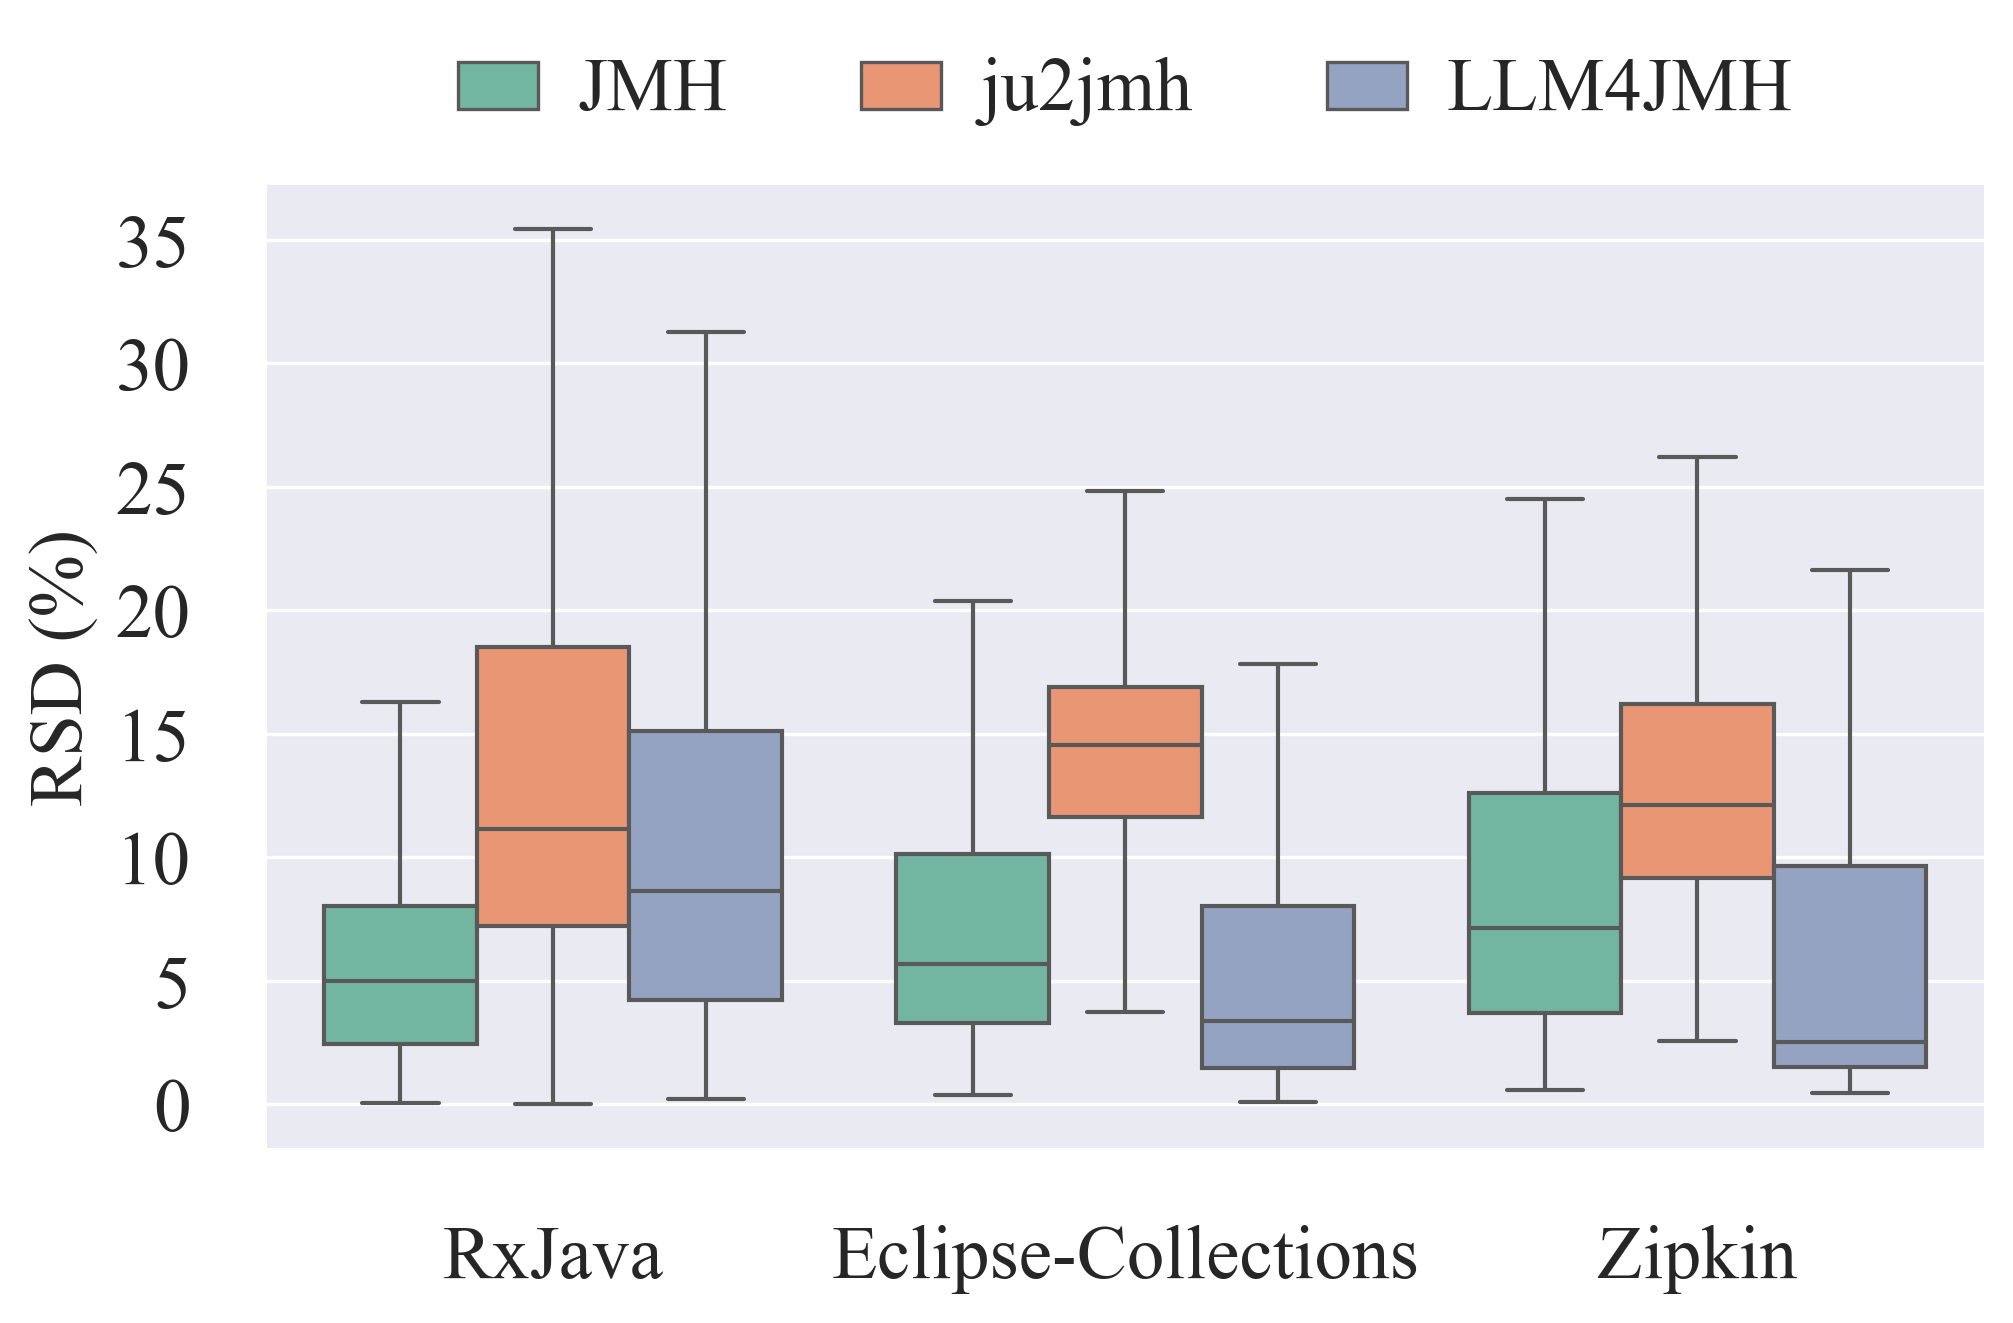

In [14]:
import json
from pathlib import Path
import pandas as pd
from typing import Dict, List, Optional
import numpy as np
from collections import defaultdict

import numpy as np
from pathlib import Path
import json 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def get_rsd_list(project: str, branch: str):
    df = pd.read_csv(f'../Data/RQ1/{project}-{branch}.csv')
    rsd_list = []
    for i, row in df.iterrows():
        thrpts = [row[f'Iteration {i}'] for i in range(30)]
        if len(thrpts) != 30:
            import ipdb; ipdb.set_trace()
        rsd = np.std(thrpts) / np.mean(thrpts) * 100
        rsd_list.append(rsd)

    return np.array(rsd_list)

def get_rsd_data() -> pd.DataFrame:
    data = {  
        'Subject': [],
        'Method': [],
        'RSD (%)': [],      
     }    
    for project in ['rxjava', 'eclipse-collections', 'zipkin']:      
        print(f'Processing project: {project}')
        mapped_project = {
            'rxjava': 'RxJava', 
            'eclipse-collections': 'Eclipse-Collections',
            'zipkin': 'Zipkin',
        }
        jmh = get_rsd_list(project, 'JMH')
        ju2jmh = get_rsd_list(project, 'ju2jmh')
        llm2jmh = get_rsd_list(project, 'LLM4JMH')        

        data['Subject'].extend([mapped_project[project]]* len(jmh))
        data['Method'].extend(['JMH'] * len(jmh))
        data['RSD (%)'].extend(jmh)
        data['Subject'].extend([mapped_project[project]] * len(ju2jmh))
        data['Method'].extend(['ju2jmh'] * len(ju2jmh))
        data['RSD (%)'].extend(ju2jmh)
        data['Subject'].extend([mapped_project[project]] * len(llm2jmh))
        data['Method'].extend(['LLM4JMH'] * len(llm2jmh))
        data['RSD (%)'].extend(llm2jmh)
       
    df = pd.DataFrame(data)
    return df

df = get_rsd_data()

sns.set(style="whitegrid")  # Clean background
sns.set(rc={
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 18,
    "font.size": 18,
    "figure.dpi": 300,
    "savefig.dpi": 300
})
sns.set_context("paper", font_scale=1)

fig, ax = plt.subplots(figsize=(6.8, 4.5))
sns.boxplot(x="Subject", y="RSD (%)", hue="Method", showfliers=False,
            data=df, palette=palette)
sns.despine(offset=10, trim=True)
plt.xlabel("", fontsize=8)
sns.move_legend(
    ax, "lower center", fontsize=16,
    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,
    handletextpad=0.6, handlelength=1.2
)
legend = ax.get_legend()
legend.set_title(legend.get_title().get_text(), prop=times_new_roman)
for text in legend.get_texts():
    text.set_fontproperties(times_new_roman)

plt.ylabel("RSD (%)", fontproperties=prop)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(times_new_roman)

plt.tight_layout()
plt.show()

# RQ1: Table 2

In [ ]:
import json
from pathlib import Path
import pandas as pd
from typing import Dict, List, Optional
import numpy as np
from collections import defaultdict

import numpy as np
from pathlib import Path
import json 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

def check_stable_unstable_cases(all_cases, name):
    stable = all_cases[all_cases <= 1]
    unstable = all_cases[all_cases >= 5]
    print(f"{name}\t: stable: {stable.shape[-1]/all_cases.shape[-1]*100:.2f} %, \tUnstable: {unstable.shape[-1]/all_cases.shape[-1]*100:.2f} %")

def get_rsd_list(project: str, branch: str):
    df = pd.read_csv(f'../Data/RQ1/{project}-{branch}.csv')
    rsd_list = []
    for i, row in df.iterrows():
        thrpts = [row[f'Iteration {i}'] for i in range(30)]
        if len(thrpts) != 30:
            import ipdb; ipdb.set_trace()
        rsd = np.std(thrpts) / np.mean(thrpts) * 100
        rsd_list.append(rsd)

    return np.array(rsd_list)

def get_rsd_data() -> pd.DataFrame:    
    for project in ['rxjava', 'eclipse-collections', 'zipkin']:      
        mapped_project = {
            'rxjava': 'RxJava', 
            'eclipse-collections': 'Eclipse-Collections',
            'zipkin': 'Zipkin',
        }
        jmh = get_rsd_list(project, 'JMH')
        ju2jmh = get_rsd_list(project, 'ju2jmh')
        llm2jmh = get_rsd_list(project, 'LLM4JMH')        

        check_stable_unstable_cases(jmh, f'{mapped_project[project]} JMH')
        check_stable_unstable_cases(ju2jmh, f'{mapped_project[project]} ju2jmh')
        check_stable_unstable_cases(llm2jmh, f'{mapped_project[project]} LLM4JMH')
       
get_rsd_data()

RxJava JMH	: stable: 7.62 %, 	Unstable: 49.75 %
RxJava ju2jmh	: stable: 4.75 %, 	Unstable: 89.96 %
RxJava LLM4JMH	: stable: 3.96 %, 	Unstable: 69.73 %
Eclipse-Collections JMH	: stable: 0.92 %, 	Unstable: 54.56 %
Eclipse-Collections ju2jmh	: stable: 0.01 %, 	Unstable: 96.99 %
Eclipse-Collections LLM4JMH	: stable: 17.82 %, 	Unstable: 35.27 %
Zipkin JMH	: stable: 2.70 %, 	Unstable: 66.22 %
Zipkin ju2jmh	: stable: 0.00 %, 	Unstable: 96.52 %
Zipkin LLM4JMH	: stable: 6.45 %, 	Unstable: 35.48 %


# RQ1: Figure 3 - RxJava

/var/folders/0g/r44s72rx3nb5_rbtvsg9v6wr0000gn/T/ipykernel_6880/124739693.py:59: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(x="Number of iterations", y="RCIW", hue="Method",  showfliers=False,


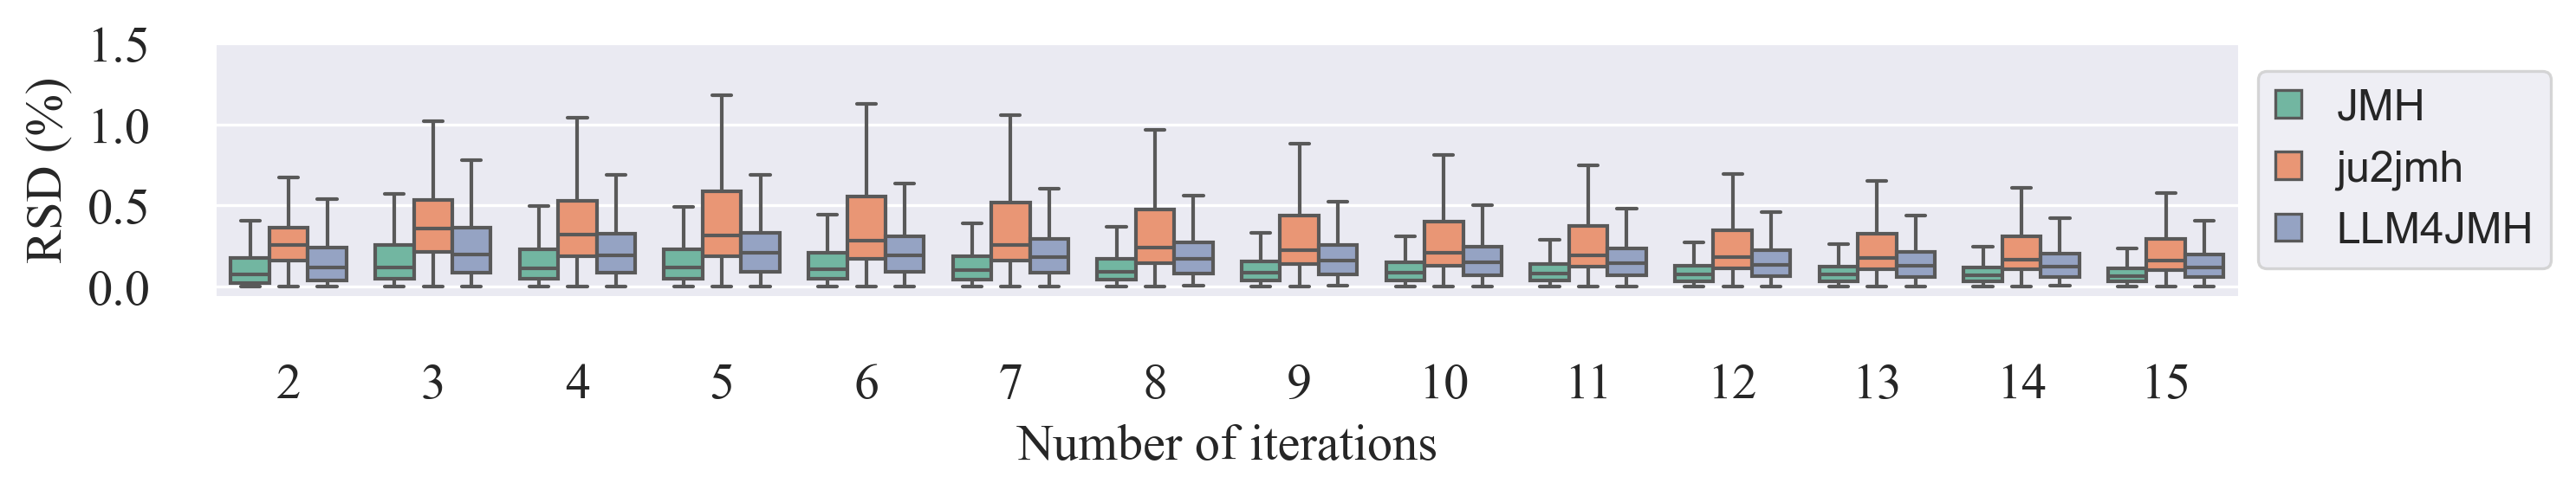

In [33]:
import json
from pathlib import Path
import pandas as pd
from typing import Dict, List, Optional
import numpy as np
from collections import defaultdict

def get_data(project: str) -> pd.DataFrame:
    rciw_path = Path(f'../Data/RQ1/{project}-RCIW.json')
    with open(rciw_path, 'r') as fp:
        branch_to_rciws_list = json.load(fp)
    data = {
        'Method': [],
        'RCIW': [],
        'Number of iterations': [],
    }

    for i in range(14):
        for branch, rciws_list in branch_to_rciws_list.items(): 
            if branch == 'jmh-tests':
                branch = 'jmh'
            if branch == 'benchmarks':
                branch = 'jmh'
            for rciws in rciws_list:                    
                if len(rciws) < 29:
                    continue
                data['Number of iterations'].append(i + 2)
                    
                if branch == 'llm2jmh':
                    data['Method'].append('LLM4JMH')
                    data['RCIW'].append(rciws[i])                
                elif branch == 'jmh':
                    data['Method'].append('JMH')
                    data['RCIW'].append(rciws[i])
                else:
                    data['Method'].append(branch)
                    data['RCIW'].append(rciws[i])
    df = pd.DataFrame(data)
    return df

project = 'rxjava'
df = get_data(project)
palette = sns.color_palette("Set2")  # Or "muted", "colorblind", etc.
sns.set(style="whitegrid")  # Clean background
sns.set(rc={
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 18,
    "font.size": 18,
    "figure.dpi": 300,
    "savefig.dpi": 300
})
sns.set_context("paper", font_scale=1)
 
fig, ax = plt.subplots(figsize=(10, 2))

sns.boxplot(x="Number of iterations", y="RCIW", hue="Method",  showfliers=False,
            data=df, palette=palette)
sns.despine(offset=10, trim=True)
plt.legend(
    bbox_to_anchor=(1.01, 0.5),  # Outside to the right
    loc='center left',
    borderaxespad=0.,
    frameon=True,
    fontsize=12,
    handlelength=0.6,    # Reduce handle length
    handleheight=0.6,    # Reduce height
)

font_path = "/System/Library/Fonts/Supplemental/Times New Roman.ttf"
times_new_roman = fm.FontProperties(fname=font_path, size=14)
prop = fm.FontProperties(fname=font_path, size=14)
# Apply globally via rcParams
plt.rcParams['font.family'] = times_new_roman.get_name()
plt.xlabel("Number of iterations", fontproperties=prop)
plt.ylabel("RSD (%)", fontproperties=prop)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(times_new_roman)

plt.tight_layout()
plt.yticks([0, 0.5, 1, 1.5])
plt.tight_layout()
plt.show()

# RQ1: Figure 3 - Eclipse-Collections

/var/folders/0g/r44s72rx3nb5_rbtvsg9v6wr0000gn/T/ipykernel_6880/583387385.py:59: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(x="Number of iterations", y="RCIW", hue="Method",  showfliers=False,


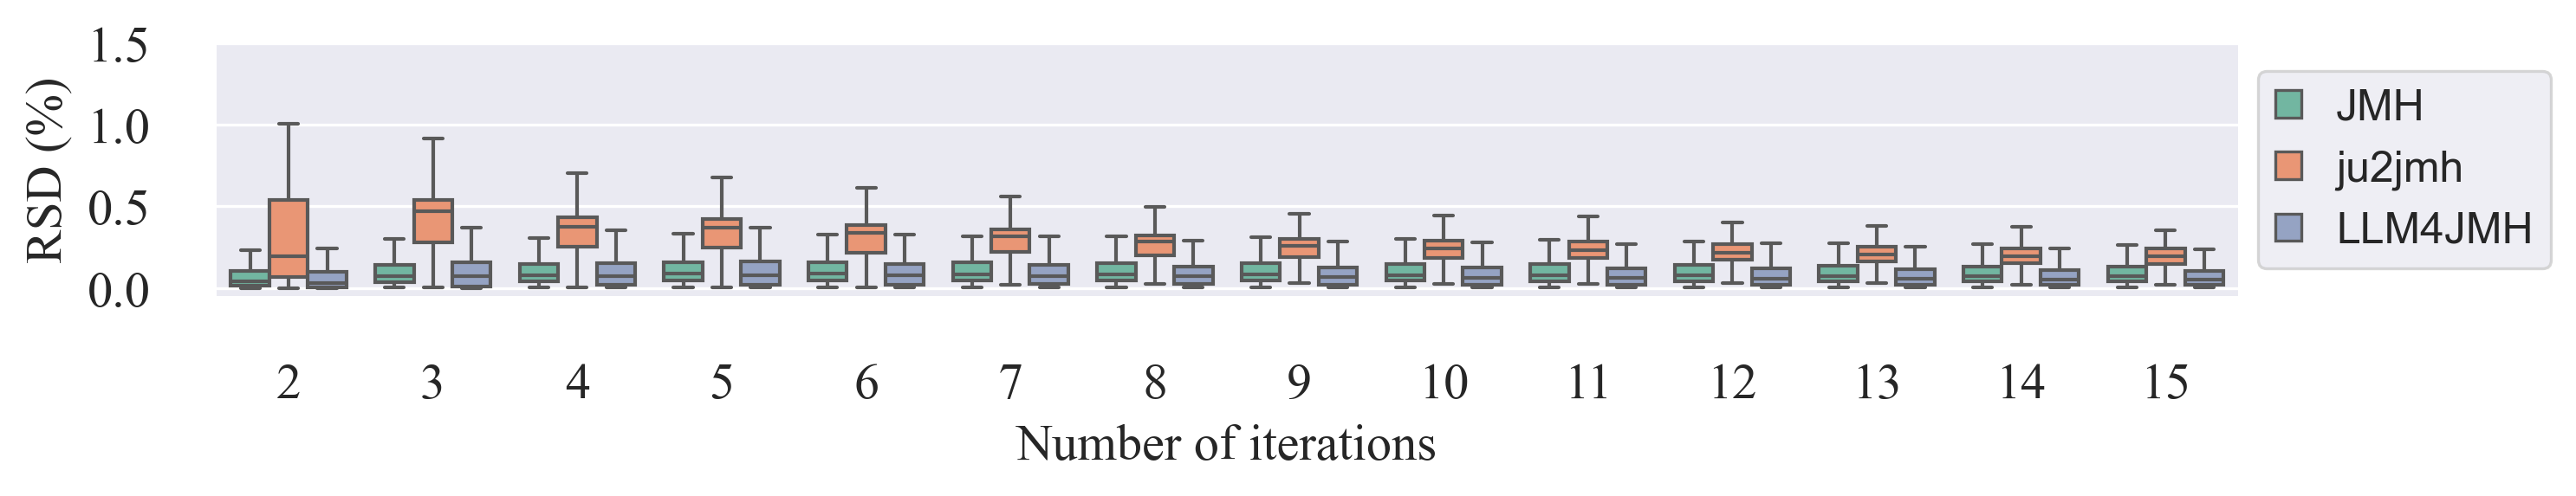

In [35]:
import json
from pathlib import Path
import pandas as pd
from typing import Dict, List, Optional
import numpy as np
from collections import defaultdict

def get_data(project: str) -> pd.DataFrame:
    rciw_path = Path(f'../Data/RQ1/{project}-RCIW.json')
    with open(rciw_path, 'r') as fp:
        branch_to_rciws_list = json.load(fp)
    data = {
        'Method': [],
        'RCIW': [],
        'Number of iterations': [],
    }

    for i in range(14):
        for branch, rciws_list in branch_to_rciws_list.items(): 
            if branch == 'jmh-tests':
                branch = 'jmh'
            if branch == 'benchmarks':
                branch = 'jmh'
            for rciws in rciws_list:                    
                if len(rciws) < 29:
                    continue
                data['Number of iterations'].append(i + 2)
                    
                if branch == 'llm2jmh':
                    data['Method'].append('LLM4JMH')
                    data['RCIW'].append(rciws[i])                
                elif branch == 'jmh':
                    data['Method'].append('JMH')
                    data['RCIW'].append(rciws[i])
                else:
                    data['Method'].append(branch)
                    data['RCIW'].append(rciws[i])
    df = pd.DataFrame(data)
    return df

project = 'eclipse-collections'
df = get_data(project)
palette = sns.color_palette("Set2")  # Or "muted", "colorblind", etc.
sns.set(style="whitegrid")  # Clean background
sns.set(rc={
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 18,
    "font.size": 18,
    "figure.dpi": 300,
    "savefig.dpi": 300
})
sns.set_context("paper", font_scale=1)
 
fig, ax = plt.subplots(figsize=(10, 2))

sns.boxplot(x="Number of iterations", y="RCIW", hue="Method",  showfliers=False,
            data=df, palette=palette)
sns.despine(offset=10, trim=True)
plt.legend(
    bbox_to_anchor=(1.01, 0.5),  # Outside to the right
    loc='center left',
    borderaxespad=0.,
    frameon=True,
    fontsize=12,
    handlelength=0.6,    # Reduce handle length
    handleheight=0.6,    # Reduce height
)

font_path = "/System/Library/Fonts/Supplemental/Times New Roman.ttf"
times_new_roman = fm.FontProperties(fname=font_path, size=14)
prop = fm.FontProperties(fname=font_path, size=14)
# Apply globally via rcParams
plt.rcParams['font.family'] = times_new_roman.get_name()
plt.xlabel("Number of iterations", fontproperties=prop)
plt.ylabel("RSD (%)", fontproperties=prop)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(times_new_roman)

plt.tight_layout()
plt.yticks([0, 0.5, 1, 1.5])
plt.tight_layout()
plt.show()

# RQ1: Figure 3 - Zipkin

/var/folders/0g/r44s72rx3nb5_rbtvsg9v6wr0000gn/T/ipykernel_6880/653302280.py:59: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.boxplot(x="Number of iterations", y="RCIW", hue="Method",  showfliers=False,


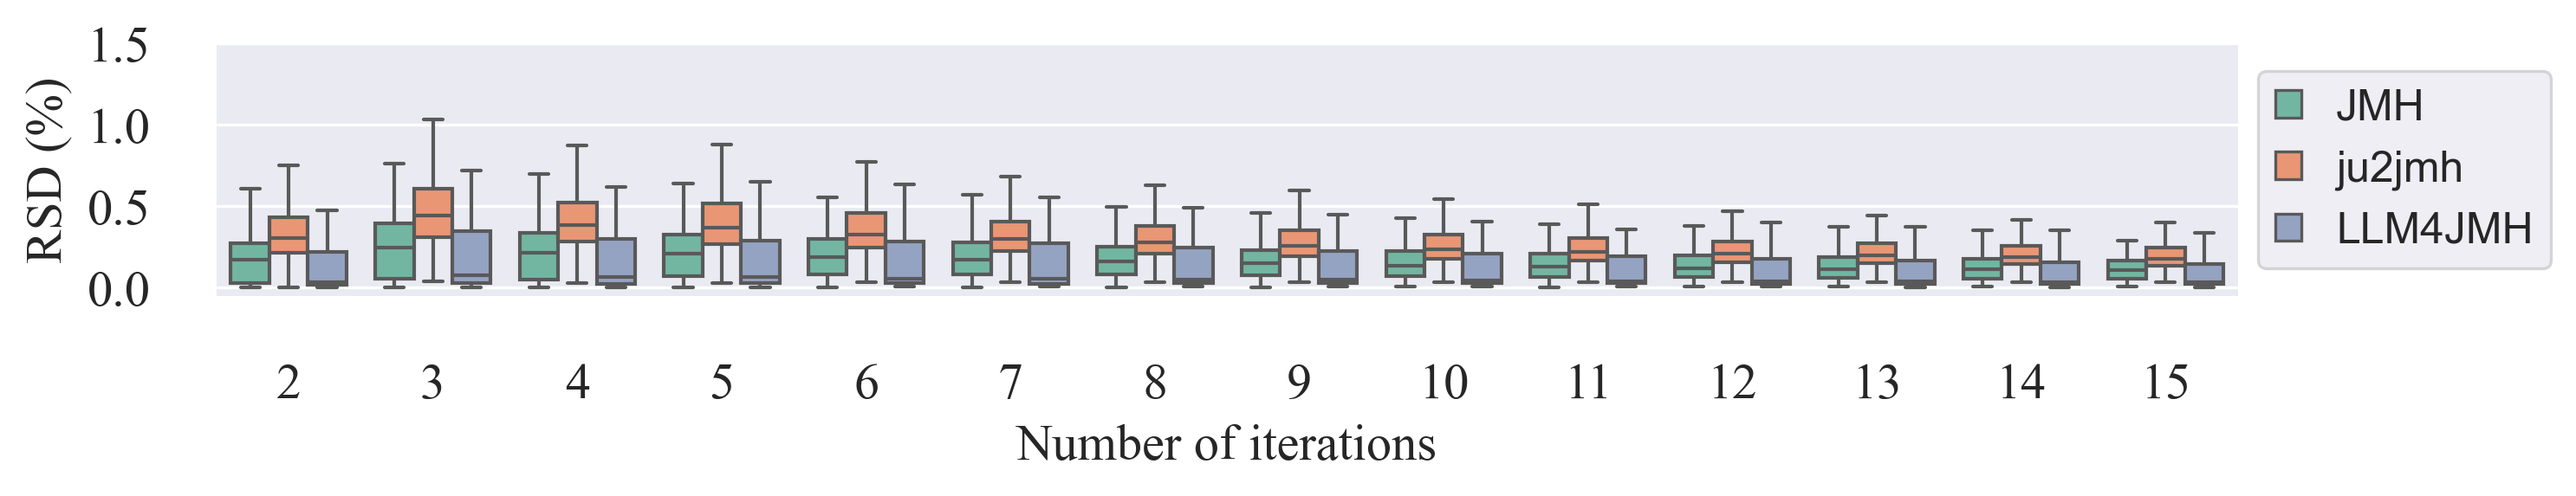

In [36]:
import json
from pathlib import Path
import pandas as pd
from typing import Dict, List, Optional
import numpy as np
from collections import defaultdict

def get_data(project: str) -> pd.DataFrame:
    rciw_path = Path(f'../Data/RQ1/{project}-RCIW.json')
    with open(rciw_path, 'r') as fp:
        branch_to_rciws_list = json.load(fp)
    data = {
        'Method': [],
        'RCIW': [],
        'Number of iterations': [],
    }

    for i in range(14):
        for branch, rciws_list in branch_to_rciws_list.items(): 
            if branch == 'jmh-tests':
                branch = 'jmh'
            if branch == 'benchmarks':
                branch = 'jmh'
            for rciws in rciws_list:                    
                if len(rciws) < 29:
                    continue
                data['Number of iterations'].append(i + 2)
                    
                if branch == 'llm2jmh':
                    data['Method'].append('LLM4JMH')
                    data['RCIW'].append(rciws[i])                
                elif branch == 'jmh':
                    data['Method'].append('JMH')
                    data['RCIW'].append(rciws[i])
                else:
                    data['Method'].append(branch)
                    data['RCIW'].append(rciws[i])
    df = pd.DataFrame(data)
    return df

project = 'zipkin'
df = get_data(project)
palette = sns.color_palette("Set2")  # Or "muted", "colorblind", etc.
sns.set(style="whitegrid")  # Clean background
sns.set(rc={
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.fontsize": 18,
    "font.size": 18,
    "figure.dpi": 300,
    "savefig.dpi": 300
})
sns.set_context("paper", font_scale=1)
 
fig, ax = plt.subplots(figsize=(10, 2))

sns.boxplot(x="Number of iterations", y="RCIW", hue="Method",  showfliers=False,
            data=df, palette=palette)
sns.despine(offset=10, trim=True)
plt.legend(
    bbox_to_anchor=(1.01, 0.5),  # Outside to the right
    loc='center left',
    borderaxespad=0.,
    frameon=True,
    fontsize=12,
    handlelength=0.6,    # Reduce handle length
    handleheight=0.6,    # Reduce height
)

font_path = "/System/Library/Fonts/Supplemental/Times New Roman.ttf"
times_new_roman = fm.FontProperties(fname=font_path, size=14)
prop = fm.FontProperties(fname=font_path, size=14)
# Apply globally via rcParams
plt.rcParams['font.family'] = times_new_roman.get_name()
plt.xlabel("Number of iterations", fontproperties=prop)
plt.ylabel("RSD (%)", fontproperties=prop)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(times_new_roman)

plt.tight_layout()
plt.yticks([0, 0.5, 1, 1.5])
plt.tight_layout()
plt.show()